# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Sidharth Vishwakarma`

Roll Number: `20CS10082`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [1]:
import torch
import torch.nn
import random
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader


## Add any other imports here
import matplotlib.pyplot as plt

In [2]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [4]:
# Model A Definition 
input_size = 28 * 28
num_classes = 10

class ModelA(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(ModelA, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, num_classes)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


# Fill in appropriately while maintaining the name of the variable
modelA = ModelA(input_size,num_classes)

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [5]:
# Model B Definiton
input_size = 28 * 28
num_classes = 10

class ModelB(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(ModelB, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, num_classes)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Use the same variable name
modelB = ModelB(input_size, num_classes)

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [6]:
# Model C Definition
input_size = 28 * 28
num_classes = 10

class ModelC(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(ModelC, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 512)
        self.fc5 = torch.nn.Linear(512, num_classes)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        return x

# Use the same variable name
modelC = ModelC(input_size, num_classes)

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [8]:
# Use the same variable names
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [9]:
# Define the hyperparameters (same for all 3 models) here
EPOCHS = 10
LEARNING_RATE = 0.001

optimizerA = optimizer(modelA.parameters(), lr=LEARNING_RATE)
optimizerB = optimizer(modelB.parameters(), lr=LEARNING_RATE)
optimizerC = optimizer(modelC.parameters(), lr=LEARNING_RATE)

### Model A 



In [10]:
# Training Loop for model A
train_lossesA = []
val_lossesA = []
train_accA = []
val_accA = []

for epoch in range(EPOCHS):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    val_correct = 0
    
    modelA.train()
    for data, target in train_loader:
        data = data.view(-1, 28*28)
        optimizerA.zero_grad()
        output = modelA(data)
        loss = criterion(output, target)
        loss.backward()
        optimizerA.step()
        train_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    
    modelA.eval()
    for data, target in val_loader:
        data = data.view(-1, 28*28)
        output = modelA(data)
        loss = criterion(output, target)
        val_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        val_correct += pred.eq(target.data.view_as(pred)).sum()
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_lossesA.append(train_loss)
    val_lossesA.append(val_loss)
    train_accA.append(100. * train_correct / len(train_loader.dataset))
    val_accA.append(100. * val_correct / len(val_loader.dataset))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTraining Accuracy: {:.2f}% \tValidation Accuracy: {:.2f}%'.format(
        epoch, train_loss, val_loss, 100. * train_correct / len(train_loader.dataset), 100. * val_correct / len(val_loader.dataset)))

Epoch: 0 	Training Loss: 0.006166 	Validation Loss: 0.003763 	Training Accuracy: 88.92% 	Validation Accuracy: 93.06%
Epoch: 1 	Training Loss: 0.002850 	Validation Loss: 0.002664 	Training Accuracy: 94.68% 	Validation Accuracy: 94.99%
Epoch: 2 	Training Loss: 0.002019 	Validation Loss: 0.002283 	Training Accuracy: 96.06% 	Validation Accuracy: 95.88%
Epoch: 3 	Training Loss: 0.001560 	Validation Loss: 0.002069 	Training Accuracy: 96.95% 	Validation Accuracy: 95.90%
Epoch: 4 	Training Loss: 0.001250 	Validation Loss: 0.001896 	Training Accuracy: 97.52% 	Validation Accuracy: 96.45%
Epoch: 5 	Training Loss: 0.001003 	Validation Loss: 0.001785 	Training Accuracy: 97.97% 	Validation Accuracy: 96.66%
Epoch: 6 	Training Loss: 0.000870 	Validation Loss: 0.001768 	Training Accuracy: 98.22% 	Validation Accuracy: 96.69%
Epoch: 7 	Training Loss: 0.000698 	Validation Loss: 0.001976 	Training Accuracy: 98.61% 	Validation Accuracy: 96.73%
Epoch: 8 	Training Loss: 0.000610 	Validation Loss: 0.001870 	Tr

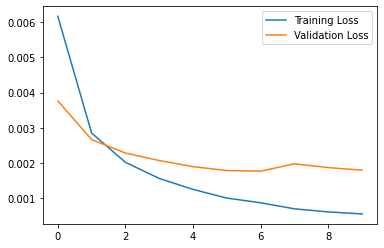

In [11]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.plot(train_lossesA, label='Training Loss')
plt.plot(val_lossesA, label='Validation Loss' )
plt.legend()
plt.show()

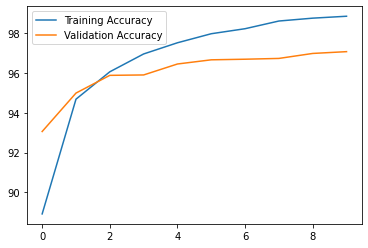

In [12]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.plot(train_accA, label='Training Accuracy')
plt.plot(val_accA, label='Validation Accuracy')
plt.legend()
plt.show()

### Model B


In [13]:
# Training Loop for model B
train_lossesB = []
val_lossesB = []
train_accB = []
val_accB = []

for epoch in range(EPOCHS):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    val_correct = 0
    
    modelB.train()
    for data, target in train_loader:
        data = data.view(-1, 28*28)
        optimizerB.zero_grad()
        output = modelB(data)
        loss = criterion(output, target)
        loss.backward()
        optimizerB.step()
        train_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    
    modelB.eval()
    for data, target in val_loader:
        data = data.view(-1, 28*28)
        output = modelB(data)
        loss = criterion(output, target)
        val_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        val_correct += pred.eq(target.data.view_as(pred)).sum()
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_lossesB.append(train_loss)
    val_lossesB.append(val_loss)
    train_accB.append(100. * train_correct / len(train_loader.dataset))
    val_accB.append(100. * val_correct / len(val_loader.dataset))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTraining Accuracy: {:.2f}% \tValidation Accuracy: {:.2f}%'.format(
        epoch, train_loss, val_loss, 100. * train_correct / len(train_loader.dataset), 100. * val_correct / len(val_loader.dataset)))

Epoch: 0 	Training Loss: 0.005617 	Validation Loss: 0.003109 	Training Accuracy: 89.06% 	Validation Accuracy: 94.03%
Epoch: 1 	Training Loss: 0.002359 	Validation Loss: 0.002172 	Training Accuracy: 95.43% 	Validation Accuracy: 95.88%
Epoch: 2 	Training Loss: 0.001722 	Validation Loss: 0.001967 	Training Accuracy: 96.63% 	Validation Accuracy: 96.34%
Epoch: 3 	Training Loss: 0.001356 	Validation Loss: 0.001889 	Training Accuracy: 97.26% 	Validation Accuracy: 96.56%
Epoch: 4 	Training Loss: 0.001092 	Validation Loss: 0.001817 	Training Accuracy: 97.78% 	Validation Accuracy: 96.58%
Epoch: 5 	Training Loss: 0.000890 	Validation Loss: 0.001817 	Training Accuracy: 98.14% 	Validation Accuracy: 96.87%
Epoch: 6 	Training Loss: 0.000767 	Validation Loss: 0.001658 	Training Accuracy: 98.39% 	Validation Accuracy: 96.79%
Epoch: 7 	Training Loss: 0.000673 	Validation Loss: 0.001620 	Training Accuracy: 98.59% 	Validation Accuracy: 97.07%
Epoch: 8 	Training Loss: 0.000545 	Validation Loss: 0.001948 	Tr

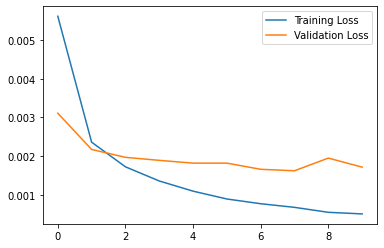

In [14]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B
plt.plot(train_lossesB, label='Training Loss')
plt.plot(val_lossesB, label='Validation Loss')
plt.legend()
plt.show()

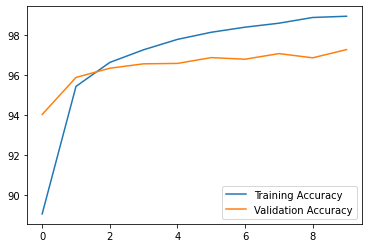

In [15]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.plot(train_accB, label='Training Accuracy')
plt.plot(val_accB, label='Validation Accuracy')
plt.legend()
plt.show()

### Model C


In [16]:
# Training Loop for model C
train_lossesC = []
val_lossesC = []
train_accC = []
val_accC = []

for epoch in range(EPOCHS):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    val_correct = 0
    
    modelC.train()
    for data, target in train_loader:
        data = data.view(-1, 28*28)
        optimizerC.zero_grad()
        output = modelC(data)
        loss = criterion(output, target)
        loss.backward()
        optimizerC.step()
        train_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    
    modelC.eval()
    for data, target in val_loader:
        data = data.view(-1, 28*28)
        output = modelC(data)
        loss = criterion(output, target)
        val_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        val_correct += pred.eq(target.data.view_as(pred)).sum()
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_lossesC.append(train_loss)
    val_lossesC.append(val_loss)
    train_accC.append(100. * train_correct / len(train_loader.dataset))
    val_accC.append(100. * val_correct / len(val_loader.dataset))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTraining Accuracy: {:.2f}% \tValidation Accuracy: {:.2f}%'.format(
        epoch, train_loss, val_loss, 100. * train_correct / len(train_loader.dataset), 100. * val_correct / len(val_loader.dataset)))

Epoch: 0 	Training Loss: 0.005419 	Validation Loss: 0.003009 	Training Accuracy: 89.17% 	Validation Accuracy: 94.07%
Epoch: 1 	Training Loss: 0.002204 	Validation Loss: 0.002180 	Training Accuracy: 95.74% 	Validation Accuracy: 95.67%
Epoch: 2 	Training Loss: 0.001640 	Validation Loss: 0.001892 	Training Accuracy: 96.74% 	Validation Accuracy: 96.34%
Epoch: 3 	Training Loss: 0.001319 	Validation Loss: 0.001997 	Training Accuracy: 97.38% 	Validation Accuracy: 96.30%
Epoch: 4 	Training Loss: 0.001131 	Validation Loss: 0.001796 	Training Accuracy: 97.73% 	Validation Accuracy: 96.68%
Epoch: 5 	Training Loss: 0.000926 	Validation Loss: 0.001775 	Training Accuracy: 98.15% 	Validation Accuracy: 96.90%
Epoch: 6 	Training Loss: 0.000828 	Validation Loss: 0.001525 	Training Accuracy: 98.32% 	Validation Accuracy: 97.27%
Epoch: 7 	Training Loss: 0.000700 	Validation Loss: 0.001796 	Training Accuracy: 98.58% 	Validation Accuracy: 96.75%
Epoch: 8 	Training Loss: 0.000663 	Validation Loss: 0.001785 	Tr

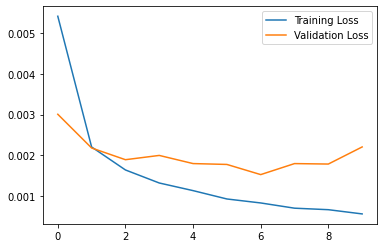

In [17]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
plt.plot(train_lossesC, label='Training Loss')
plt.plot(val_lossesC, label='Validation Loss')
plt.legend()
plt.show()

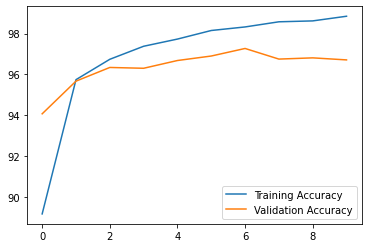

In [18]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.plot(train_accC, label='Training Accuracy')
plt.plot(val_accC, label='Validation Accuracy')
plt.legend()
plt.show()

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [19]:
# Leaky ReLU model definiton
class ModelLeakyReLU(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(ModelLeakyReLU, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 512)
        self.fc5 = torch.nn.Linear(512, num_classes)
        self.leakyrelu = torch.nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyrelu(x)
        x = self.fc2(x)
        x = self.leakyrelu(x)
        x = self.fc3(x)
        x = self.leakyrelu(x)
        x = self.fc4(x)
        x = self.leakyrelu(x)
        x = self.fc5(x)
        return x

# Tanh model definition
class ModelTanh(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(ModelTanh, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 512)
        self.fc5 = torch.nn.Linear(512, num_classes)
        self.tanh = torch.nn.Tanh()

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        x = self.tanh(x)
        x = self.fc4(x)
        x = self.tanh(x)
        x = self.fc5(x)
        return x

# Maintain these variable names
model_lrelu = ModelLeakyReLU(input_size, num_classes)
model_tanh = ModelTanh(input_size, num_classes)

optimizer_lrelu = optimizer(model_lrelu.parameters(), lr=LEARNING_RATE)
optimizer_tanh = optimizer(model_tanh.parameters(), lr=LEARNING_RATE)

### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [20]:
# Training Loop for LRELU
train_lossesLRELU = []
val_lossesLRELU = []
train_accLRELU = []
val_accLRELU = []

for epoch in range(EPOCHS):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    val_correct = 0
    
    model_lrelu.train()
    for data, target in train_loader:
        data = data.view(-1, 28*28)
        optimizer_lrelu.zero_grad()
        output = model_lrelu(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_lrelu.step()
        train_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    
    model_lrelu.eval()
    for data, target in val_loader:
        data = data.view(-1, 28*28)
        output = model_lrelu(data)
        loss = criterion(output, target)
        val_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        val_correct += pred.eq(target.data.view_as(pred)).sum()
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_lossesLRELU.append(train_loss)
    val_lossesLRELU.append(val_loss)
    train_accLRELU.append(100. * train_correct / len(train_loader.dataset))
    val_accLRELU.append(100. * val_correct / len(val_loader.dataset))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTraining Accuracy: {:.2f}% \tValidation Accuracy: {:.2f}%'.format(
        epoch, train_loss, val_loss, 100. * train_correct / len(train_loader.dataset), 100. * val_correct / len(val_loader.dataset)))

Epoch: 0 	Training Loss: 0.005158 	Validation Loss: 0.002614 	Training Accuracy: 89.89% 	Validation Accuracy: 95.01%
Epoch: 1 	Training Loss: 0.002104 	Validation Loss: 0.002969 	Training Accuracy: 95.87% 	Validation Accuracy: 94.49%
Epoch: 2 	Training Loss: 0.001571 	Validation Loss: 0.001768 	Training Accuracy: 97.00% 	Validation Accuracy: 96.56%
Epoch: 3 	Training Loss: 0.001261 	Validation Loss: 0.001824 	Training Accuracy: 97.49% 	Validation Accuracy: 96.40%
Epoch: 4 	Training Loss: 0.001060 	Validation Loss: 0.002011 	Training Accuracy: 97.88% 	Validation Accuracy: 96.35%
Epoch: 5 	Training Loss: 0.000912 	Validation Loss: 0.001781 	Training Accuracy: 98.17% 	Validation Accuracy: 96.83%
Epoch: 6 	Training Loss: 0.000745 	Validation Loss: 0.002076 	Training Accuracy: 98.47% 	Validation Accuracy: 96.56%
Epoch: 7 	Training Loss: 0.000662 	Validation Loss: 0.001854 	Training Accuracy: 98.61% 	Validation Accuracy: 97.09%
Epoch: 8 	Training Loss: 0.000635 	Validation Loss: 0.001620 	Tr

In [21]:
# Training Loop for TanH
train_lossesTANH = []
val_lossesTANH = []
train_accTANH = []
val_accTANH = []

for epoch in range(EPOCHS):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    val_correct = 0
    
    model_tanh.train()
    for data, target in train_loader:
        data = data.view(-1, 28*28)
        optimizer_tanh.zero_grad()
        output = model_tanh(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_tanh.step()
        train_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    
    model_tanh.eval()
    for data, target in val_loader:
        data = data.view(-1, 28*28)
        output = model_tanh(data)
        loss = criterion(output, target)
        val_loss += loss.item()
        pred = output.data.max(1, keepdim=True)[1]
        val_correct += pred.eq(target.data.view_as(pred)).sum()
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_lossesTANH.append(train_loss)
    val_lossesTANH.append(val_loss)
    train_accTANH.append(100. * train_correct / len(train_loader.dataset))
    val_accTANH.append(100. * val_correct / len(val_loader.dataset))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTraining Accuracy: {:.2f}% \tValidation Accuracy: {:.2f}%'.format(
        epoch, train_loss, val_loss, 100. * train_correct / len(train_loader.dataset), 100. * val_correct / len(val_loader.dataset)))

Epoch: 0 	Training Loss: 0.005377 	Validation Loss: 0.003921 	Training Accuracy: 89.56% 	Validation Accuracy: 92.60%
Epoch: 1 	Training Loss: 0.002816 	Validation Loss: 0.002686 	Training Accuracy: 94.56% 	Validation Accuracy: 94.95%
Epoch: 2 	Training Loss: 0.002129 	Validation Loss: 0.002404 	Training Accuracy: 95.77% 	Validation Accuracy: 95.59%
Epoch: 3 	Training Loss: 0.001670 	Validation Loss: 0.002242 	Training Accuracy: 96.78% 	Validation Accuracy: 95.87%
Epoch: 4 	Training Loss: 0.001469 	Validation Loss: 0.002593 	Training Accuracy: 97.02% 	Validation Accuracy: 95.30%
Epoch: 5 	Training Loss: 0.001225 	Validation Loss: 0.002177 	Training Accuracy: 97.58% 	Validation Accuracy: 96.04%
Epoch: 6 	Training Loss: 0.001029 	Validation Loss: 0.002077 	Training Accuracy: 97.89% 	Validation Accuracy: 96.40%
Epoch: 7 	Training Loss: 0.000918 	Validation Loss: 0.002071 	Training Accuracy: 98.17% 	Validation Accuracy: 96.44%
Epoch: 8 	Training Loss: 0.000829 	Validation Loss: 0.002013 	Tr

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [22]:
# Define how to calculate Accuracy on Test Set
def test(model):
    correct = 0
    total = 0
    for data, target in test_loader:
        data = data.view(-1, 28*28)
        output = model(data)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
        total += target.size(0)
    return 100. * correct / total

In [23]:
# Accuracy of RELU model
print('Accuracy of RELU model: {}%'.format(test(modelC)))

Accuracy of RELU model: 96.9000015258789%


In [24]:
# Accuracy of TanH model
print('Accuracy of TanH model: {}%'.format(test(model_tanh)))

Accuracy of TanH model: 96.81999969482422%


In [25]:
# Accuracy of LeakyReLU model
print('Accuracy of LeakyReLU model: {}%'.format(test(model_lrelu)))

Accuracy of LeakyReLU model: 97.70999908447266%


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `96.9000015258789` %
* TanH model Test Set Accuracy: `96.81999969482422` %
* LeakReLU model Test Set Accuracy: `97.70999908447266` %